날씨별 1등 많이한 말 <br>
데이터 기간 내의 1등한 횟수(ORD == 1)

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('source/raw_vol2.0.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54749 entries, 0 to 54748
Data columns (total 92 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MEET             54749 non-null  object 
 1   RC_DATE          54749 non-null  int64  
 2   RC_NO            54749 non-null  int64  
 3   RC_DIST          54749 non-null  int64  
 4   RANK             54749 non-null  object 
 5   WEATHER          54749 non-null  object 
 6   TR_CON           54749 non-null  object 
 7   TR_WC            54749 non-null  int64  
 8   ORD              54749 non-null  int64  
 9   CHUL_NO          54749 non-null  int64  
 10  HR_NAME          54749 non-null  object 
 11  HR_NO            54749 non-null  int64  
 12  NAME             54749 non-null  object 
 13  PRD_NAME         54749 non-null  object 
 14  AGE              54749 non-null  int64  
 15  SEX              54749 non-null  object 
 16  horse_weight     54749 non-null  float64
 17  weight_gain 

In [4]:
df = df[df['ORD'] == 1]

In [5]:
weather_count = df.groupby(['WEATHER','HR_NAME']).count().sort_values(by= 'ORD', ascending= False)

In [6]:
weather_count.iloc[:30, :1]

MEET
WEATHER HR_NAME      
맑음      대장대부       11
        비양         10
        왕의귀환        9
        미래황제        9
        휘날리며        9
        사상최강        9
        오라돌풍        8
        삼다호걸        8
        청룡스타        8
        대망의길        8
        멘탈          8
        서부캣         8
        서부파워        8
        유명세         7
        신의용병        7
        전농왕         7
        전승문화        7
        청록비상        7
        한백챔프        7
        미스터어플릿      7
        별빛누리        7
        바베어리언       7
        초강수         7
        백록비천        7
        일사만리        7
        금누리         7
        대왕조         7
        돌격개시        7
        광아의명성       6
        광산대로        6

In [7]:
top_10_first_place_per_weather = df[df['ORD'] == 1].groupby('WEATHER').apply(
    lambda x: x['HR_NAME'].value_counts().nlargest(10)
).reset_index(name='First_Place_Count')

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_1948\4074578785.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_10_first_place_per_weather = df[df['ORD'] == 1].groupby('WEATHER').apply(


In [8]:
top10_weather = top_10_first_place_per_weather

In [9]:
top10_weather

,WEATHER,HR_NAME,First_Place_Count
0,강풍,마하원더,1
1,강풍,서부빅스텝,1
2,눈,우듬지,2
3,눈,바로고,2
4,눈,달의전사,1
5,눈,히든카드,1
6,눈,금불환,1
7,눈,전승환호,1
8,눈,명가으뜸,1
9,눈,전설무적,1


In [10]:
good_weather = top10_weather.loc[top10_weather['WEATHER'] == '맑음']
bad_weather = top10_weather.loc[top10_weather['WEATHER'] == '흐림']

In [11]:
import matplotlib.pyplot as plt

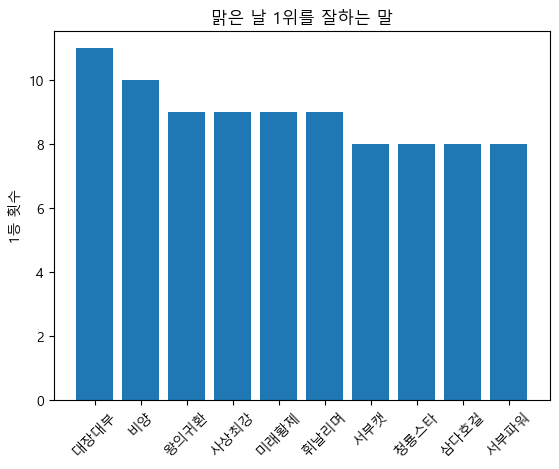

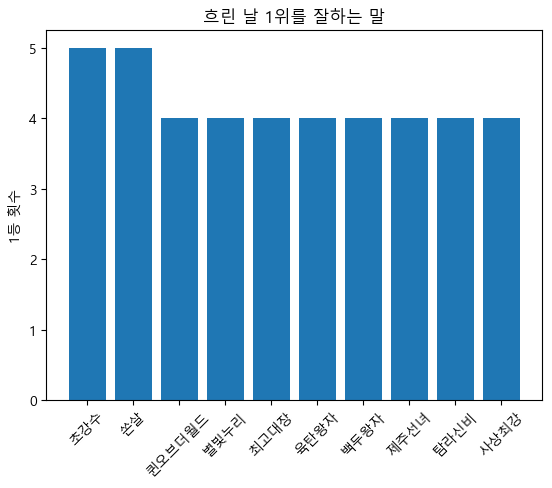

In [12]:
plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows의 경우

plt.bar(good_weather['HR_NAME'], good_weather['First_Place_Count'])
plt.xticks(rotation = 45)
plt.title('맑은 날 1위를 잘하는 말')
plt.ylabel('1등 횟수')
plt.show()

plt.bar(bad_weather['HR_NAME'], bad_weather['First_Place_Count'])
plt.xticks(rotation = 45)
plt.title('흐린 날 1위를 잘하는 말')
plt.ylabel('1등 횟수')
plt.show()